# PyTorch - Wstęp
PyTorch operuje na tensorach, które są strukturą danych podobną do tablic numpy:

In [58]:
import torch
t1 = torch.tensor([[1., 0], [2, 3]])
print(t1)
print(t1.numpy())
print(torch.tensor(t1.numpy()))

tensor([[1., 0.],
        [2., 3.]])
[[1. 0.]
 [2. 3.]]
tensor([[1., 0.],
        [2., 3.]])


To co odróżnia tensory od tablic, to ich zdolność do przechowywania informacji o operacjach i liczenia z nich gradientu. 

Przykładowo, dwuwymiarowy gradient z funkcji f(x,y) = x*y + y w punkcie x=1000, y=2:

In [59]:
x = torch.tensor([1000.], requires_grad = True)
y = torch.tensor([2.], requires_grad = True)
t3 = x * y + y
t3.backward()
with torch.no_grad():
  #print('dt3/da:', x.grad)
  #print('dt3/db:', y.grad)
  x.grad.zero_()
  y.grad.zero_()

# Zadanie 1: Regresja liniowa z użyciem tensorów i torch.nn

1. Wykonaj regresję liniową do podanego zbioru punktów i utwórz wykres błędu średniego w funkcji epoki.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as nF

In [61]:
X = torch.tensor([1., 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])

In [62]:
# # I krok
# #Gradient update (w pętli epoch):
# with torch.no_grad():
#   a -= learning_rate*a.grad
#   b -= learning_rate*b.grad
#   x.grad.zero_()
#   y.grad.zero_()
# # II krok
# dataset = TensorDataset(X, f)
# batch_size = 4
# train_load = DataLoader(train_data, batch_size, shuffle = True)
# ...
# #tuż pod pętlą epok:
# for x_pull, f_pull in train_load:

# # III krok
# #Użyjemy wbudowanej funkcji liczącej loss
# loss_fn = nF.mse_loss
# #Tam gdzie liczymy loss:
# loss = loss_fn(y_pred, y_pull)
# loss.backward()

# #IV krok
# #Zmieniamy X i f:
# X = X.reshape(8,1)
# f = f.reshape(8,1)
# #Zamiast ręcznie zmieniać a, b:
# #na samym początku:
# model = nn.Linear(1, 1)
# opt = torch.optim.SGD(model.parameters()model = nn.Linear(1, 1)
# opt = torch.optim.SGD(model.parameters(), lr=1e-5), lr=1e-5)
# #update gradientu:
# y_pred = model(x_pull)
# loss.backward()
# opt.step()
# opt.zero_grad()

In [63]:
x = torch.tensor([1., 2, 3, 4, 5, 6, 7, 8])
y = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])
a = torch.tensor([0.0], requires_grad=True) 
b = torch.tensor([1.0], requires_grad=True)

In [64]:
learning_rate = 0.001
epochs = 1000
error = []

x = x.reshape(8,1)
y = y.reshape(8,1)
model = nn.Linear(1, 1)
# opt = torch.optim.SGD(model.parameters(), nn.Linear(1, 1))
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

train_data = TensorDataset(x, y)
batch_size = 4
train_load = DataLoader(train_data, batch_size, shuffle = True)

for epoch in range(epochs):
  epoch_cost = 0
  for x_pull, y_pull in train_load:
    # y_pred = (a + b*x_pull)
    y_pred = model(x_pull)
    loss_fn = nF.mse_loss
    epoch_cost = loss_fn(y_pred, y_pull)

    # with torch.no_grad():
    #   a -= learning_rate*a.grad
    #   b -= learning_rate*b.grad
    #   a.grad.zero_()
    #   b.grad.zero_()

    error.append(epoch_cost)
    
    epoch_cost.backward()
    opt.step()
    opt.zero_grad()


In [65]:
# y_preds = a + b*x
y_preds = model(x)
y_preds = y_preds.cpu().detach().numpy()
print(y_preds)

# run just once
for i in range(len(error)):
  error[i] = error[i].cpu().detach().numpy()

print(error)

[[ 1.5496588]
 [ 2.99283  ]
 [ 4.4360013]
 [ 5.8791723]
 [ 7.3223433]
 [ 8.765514 ]
 [10.208685 ]
 [11.651856 ]]
[array(22.547695, dtype=float32), array(13.351162, dtype=float32), array(16.95045, dtype=float32), array(11.974171, dtype=float32), array(8.267576, dtype=float32), array(15.212369, dtype=float32), array(9.920835, dtype=float32), array(8.971759, dtype=float32), array(11.629022, dtype=float32), array(3.913261, dtype=float32), array(4.4478307, dtype=float32), array(8.022722, dtype=float32), array(7.3755445, dtype=float32), array(2.8054848, dtype=float32), array(5.929946, dtype=float32), array(2.3424127, dtype=float32), array(2.495266, dtype=float32), array(4.213288, dtype=float32), array(2.697787, dtype=float32), array(2.765812, dtype=float32), array(2.9644659, dtype=float32), array(1.5521562, dtype=float32), array(1.3440516, dtype=float32), array(2.3727918, dtype=float32), array(2.2532053, dtype=float32), array(0.82368386, dtype=float32), array(1.9953557, dtype=float32), array

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


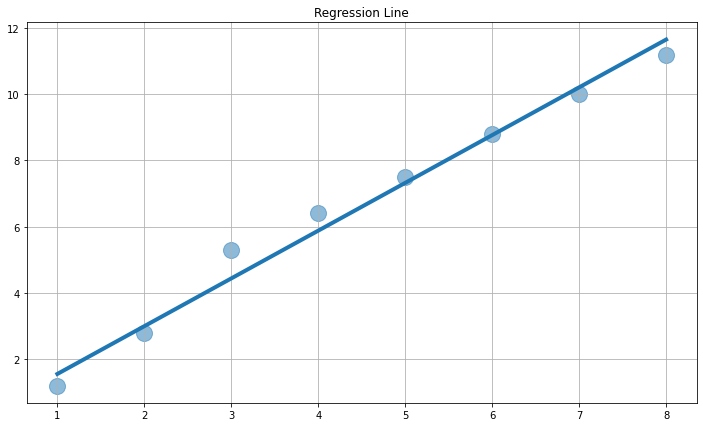

In [66]:
plt.figure(figsize=(12, 7))
plt.title('Regression Line')
plt.scatter(x, y, s=256, alpha=0.5, label='Y')
plt.plot(sorted(x), sorted(y_preds), linewidth=4)
plt.grid()
plt.show()

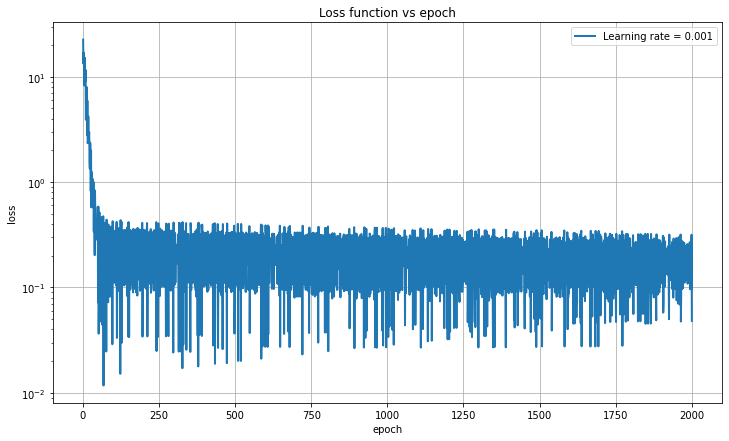

In [67]:
plt.figure(figsize=(12, 7))
plt.title('Loss function vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(1, len(error)+1), error, linewidth=2, label='Learning rate = 0.001')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

# Zadanie 2: Użycie liniowego modelu torch.nn do analizy wybranego zestawu danych

1. Dokonaj wielowymiarowej regresji liniowej do wybranego zbioru danych (przynajmniej 3 zmienne) i zilustruj wyniki jak w poprzednich przykładach. Ponieważ nie jesteśmy w stanie narysować n-wymiarowego wykresu dopasowania, podziel dane na trenujące i testujące i na nich sprawdź poprawność modelu.

In [68]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X_init = iris_dataset['data'][:,0:4]
Y_init = iris_dataset['target']

# print(X_init.shape)
# print(Y_init.shape)
X = torch.tensor([X_init[i] for i in range(150)])
Y = torch.tensor([Y_init[i] for i in range(150)])

X = X.reshape(150, 4).float()
Y = Y.reshape(150,1).float()
model = nn.Linear(4, 1)
opt = torch.optim.SGD(model.parameters(), lr=1e-3)

train_data = TensorDataset(X, Y)
batch_size = 4
train_load = DataLoader(train_data, batch_size, shuffle = True)

epochs = 1000
error = []

for epoch in range(epochs):
  epoch_cost = 0
  for x_pull, y_pull in train_load:
    y_pred = model(x_pull)
    loss_fn = nF.mse_loss
    epoch_cost = loss_fn(y_pred, y_pull)
    error.append(epoch_cost)
    
    epoch_cost.backward()
    opt.step()
    opt.zero_grad()


In [69]:
y_preds = model(X)
y_preds = y_preds.cpu().detach().numpy()
print(y_preds)

# run just once
for i in range(len(error)):
  error[i] = error[i].cpu().detach().numpy()

#print(error)

[[-0.09927978]
 [-0.06633152]
 [-0.07397743]
 [-0.01363496]
 [-0.09123279]
 [ 0.04743101]
 [ 0.01364483]
 [-0.06267731]
 [-0.01164992]
 [-0.10324238]
 [-0.11171959]
 [-0.01802783]
 [-0.11411984]
 [-0.13306595]
 [-0.23198183]
 [-0.04345201]
 [-0.04752897]
 [-0.04103671]
 [-0.03976862]
 [-0.02452002]
 [-0.05701636]
 [ 0.0361308 ]
 [-0.14437364]
 [ 0.15148492]
 [ 0.05319203]
 [-0.02930628]
 [ 0.07754888]
 [-0.08599453]
 [-0.10732676]
 [-0.00275747]
 [-0.01080452]
 [ 0.01198985]
 [-0.15868424]
 [-0.15795316]
 [-0.04499929]
 [-0.12908168]
 [-0.1648388 ]
 [-0.13902117]
 [-0.0377977 ]
 [-0.07313208]
 [-0.0543219 ]
 [ 0.02684502]
 [-0.04261322]
 [ 0.19162734]
 [ 0.12868293]
 [ 0.00236632]
 [-0.05902313]
 [-0.03978272]
 [-0.10126494]
 [-0.08400948]
 [ 1.1916393 ]
 [ 1.2651311 ]
 [ 1.3102251 ]
 [ 1.1457077 ]
 [ 1.2880472 ]
 [ 1.2314591 ]
 [ 1.378901  ]
 [ 0.86511934]
 [ 1.1586987 ]
 [ 1.2019442 ]
 [ 0.91177565]
 [ 1.2510005 ]
 [ 0.9211123 ]
 [ 1.2929554 ]
 [ 1.0258465 ]
 [ 1.1541916 ]
 [ 1.35358

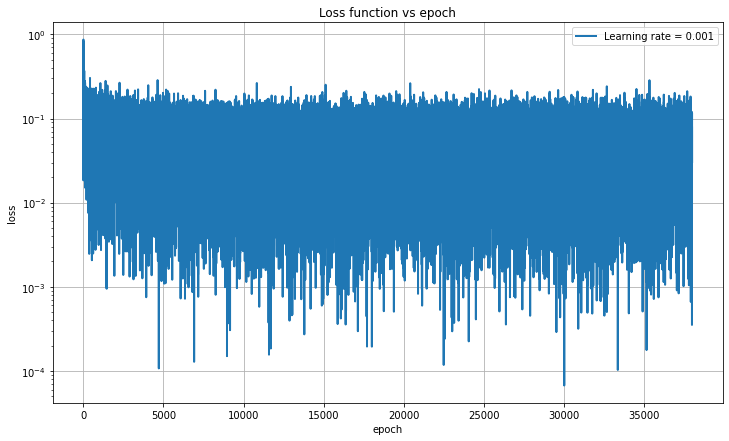

In [70]:
plt.figure(figsize=(12, 7))
plt.title('Loss function vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(1, len(error)+1), error, linewidth=2, label='Learning rate = 0.001')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

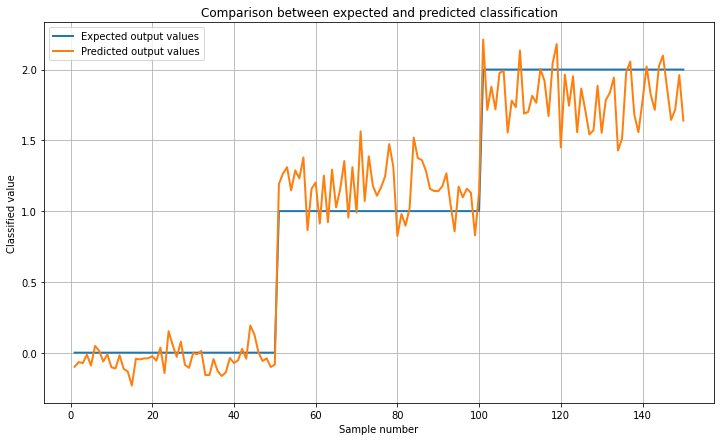

In [71]:
plt.figure(figsize=(12, 7))
plt.title('Comparison between expected and predicted classification')
plt.xlabel('Sample number')
plt.ylabel('Classified value')
plt.plot(np.arange(1, len(Y)+1), Y, linewidth=2, label='Expected output values')
plt.plot(np.arange(1, len(Y)+1), y_preds, linewidth=2, label='Predicted output values')
plt.legend()
plt.grid()
plt.show()